In [1]:
!pip install --upgrade diffusers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00


In [2]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


1. **from pathlib import Path**

  La bibliothèque pathlib est utilisée pour manipuler des chemins de fichiers de manière plus intuitive et moderne que les chaînes de caractères simples. Path est une classe de cette bibliothèque qui permet de manipuler des chemins de fichiers et de répertoires de manière plus pratique.

2. **import tqdm**

  tqdm est une bibliothèque qui permet de créer des barres de progression. Elle est souvent utilisée dans des boucles pour montrer la progression des tâches longues, comme le traitement de données ou le téléchargement de fichiers.

3. **import torch**

  torch est la bibliothèque principale de PyTorch, un framework de deep learning. Elle est utilisée pour créer et manipuler des tenseurs, ainsi que pour construire et entraîner des modèles de machine learning.

4. **import pandas as pd**

  pandas est une bibliothèque puissante pour la manipulation et l'analyse des données. Elle fournit des structures de données de haut niveau comme les DataFrames, et des outils pour travailler efficacement avec des données structurées.

5. **import numpy as np**

  numpy est une bibliothèque fondamentale pour le calcul scientifique en Python. Elle fournit un support pour les tableaux et les matrices de grande dimension, ainsi que des fonctions mathématiques de haut niveau pour opérer sur ces tableaux.

6. **from diffusers import StableDiffusionPipeline**

  diffusers est une bibliothèque développée par Hugging Face qui contient des outils et des modèles pour les tâches de diffusion, comme la génération d'images à partir de texte. StableDiffusionPipeline est une classe qui permet d'interagir facilement avec le modèle de diffusion stable pour générer des images.

7. **from transformers import pipeline, set_seed**

  transformers est une bibliothèque développée par Hugging Face qui contient des modèles de pointe pour le traitement du langage naturel (NLP) et d'autres tâches de machine learning. pipeline est une interface simple pour utiliser ces modèles pour diverses tâches (comme la classification, la génération de texte, etc.), et set_seed est une fonction pour fixer la graine aléatoire afin de rendre les résultats reproductibles.

8. **import matplotlib.pyplot as plt**

  matplotlib est une bibliothèque pour créer des visualisations en Python. pyplot est un module de cette bibliothèque qui fournit une interface de type MATLAB pour tracer des graphiques.

9. **import cv2**

  cv2 est la bibliothèque OpenCV (Open Source Computer Vision Library), une bibliothèque très utilisée pour le traitement d'images et la vision par ordinateur.

Ces imports configurent l'environnement en chargeant les bibliothèques nécessaires pour le traitement de texte, la génération d'images, la manipulation de données, et la visualisation.

In [3]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

# Classe `CFG`
`CFG` est une classe de configuration qui regroupe plusieurs paramètres et configurations que vous allez utiliser dans votre script. Utiliser une classe de configuration est une bonne pratique pour organiser et centraliser les paramètres, ce qui rend le code plus propre et plus facile à maintenir.

### `device = "cuda"`
Cette ligne spécifie que le modèle doit être exécuté sur un GPU (via CUDA). CUDA est une plateforme de calcul parallèle et une API de programmation créée par Nvidia, qui permet d'utiliser les GPU pour l'informatique générale.

### `seed = 42`
La graine (seed) est utilisée pour initialiser le générateur de nombres aléatoires. En fixant une graine, vous vous assurez que les résultats sont reproductibles. Le choix du nombre 42 est une convention commune, mais vous pouvez utiliser n'importe quel nombre.

### `generator = torch.Generator(device).manual_seed(seed)`
- `torch.Generator(device)` crée un générateur de nombres aléatoires pour le GPU spécifié par device.
- `.manual_seed(seed)` initialise ce générateur avec la graine seed.

Ce générateur sera utilisé pour les opérations aléatoires dans le modèle, garantissant ainsi la reproductibilité des résultats.

### `image_gen_steps = 35`
Ce paramètre définit le nombre de pas (steps) que l'algorithme de diffusion doit effectuer pour générer une image. Plus le nombre de pas est élevé, plus l'image peut être détaillée, mais cela augmente aussi le temps de génération.

### `image_gen_model_id = "stabilityai/stable-diffusion-2"`
Ceci spécifie l'ID du modèle de génération d'images que vous allez utiliser. Ici, il s'agit du modèle "stable-diffusion-2" fourni par StabilityAI.

### `image_gen_size = (400, 400)`
Ce paramètre définit la taille des images générées, en pixels. Dans ce cas, les images seront de 400x400 pixels.

### `image_gen_guidance_scale = 9`
Le guidance_scale est un paramètre qui contrôle l'influence du texte sur l'image générée. Un scale plus élevé signifie que l'image sera plus fidèle à la description textuelle fournie.

### `prompt_gen_model_id = "gpt2"`
Ceci spécifie l'ID du modèle de génération de texte que vous allez utiliser. Ici, il s'agit du modèle "gpt2" fourni par OpenAI.

### `prompt_dataset_size = 6`
  
  Ce paramètre pourrait définir la taille du dataset ou le nombre de prompts que vous allez générer ou utiliser pour l'entraînement ou l'évaluation.

### `prompt_max_length = 12`
  Ce paramètre définit la longueur maximale des prompts textuels générés, en termes de nombre de tokens (ou mots).


La classe `CFG` regroupe et définit tous les paramètres importants que vous utiliserez dans votre pipeline de génération de texte et d'images. Ces paramètres incluent les configurations pour l'utilisation du GPU, la reproductibilité, les modèles à utiliser, et les spécificités de génération tant pour le texte que pour les images.


In [4]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:219: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
vae/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': 'your_hugging_face_auth_token', 'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]



# Initialisation du Modèle de Génération d'Images

### `image_gen_model = StableDiffusionPipeline.from_pretrained(...)`
Cette ligne de code initialise le modèle de génération d'images en utilisant la classe `StableDiffusionPipeline` de la bibliothèque `diffusers`. La méthode `from_pretrained` charge un modèle pré-entraîné depuis Hugging Face.

#### Paramètres :
- `CFG.image_gen_model_id` : L'ID du modèle à charger, spécifié dans la classe de configuration `CFG`.
- `torch_dtype=torch.float16` : Définit le type de données utilisé pour les tenseurs PyTorch comme étant des flottants 16 bits (float16). Cela permet de réduire l'utilisation de la mémoire et d'accélérer les calculs sur les GPU compatibles.
- `revision="fp16"` : Spécifie que la révision du modèle à utiliser est optimisée pour les calculs en flottants 16 bits.
- `use_auth_token='your_hugging_face_auth_token'` : Utilise un jeton d'authentification pour accéder au modèle sur Hugging Face. Remplacez `'your_hugging_face_auth_token'` par votre propre jeton d'authentification.
- `guidance_scale=9` : Paramètre qui contrôle l'influence du texte sur l'image générée. Une valeur plus élevée signifie que l'image sera plus fidèle à la description textuelle fournie.

### `image_gen_model = image_gen_model.to(CFG.device)`
Cette ligne déplace le modèle chargé vers le dispositif spécifié (ici, le GPU). `CFG.device` est défini comme `"cuda"` dans la classe de configuration, ce qui signifie que le modèle sera exécuté sur un GPU pour des performances accrues.


Ces lignes de code chargent et configurent le modèle de diffusion stable pour générer des images, en utilisant des optimisations pour le GPU et des types de données efficaces pour accélérer le traitement.


In [5]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

# Fonction `generate_image`

### Définition de la Fonction
La fonction `generate_image` prend deux arguments :
- `prompt` : Une chaîne de caractères représentant la description textuelle de l'image à générer.
- `model` : Le modèle de génération d'images à utiliser (par exemple, une instance de `StableDiffusionPipeline`).

### Génération de l'Image
La fonction utilise le modèle pour générer une image à partir du prompt fourni. Les paramètres utilisés sont :
- `prompt` : La description textuelle pour générer l'image.
- `num_inference_steps=CFG.image_gen_steps` : Le nombre de pas que l'algorithme de diffusion doit effectuer pour générer l'image. Ce paramètre est défini dans la classe de configuration `CFG`.
- `generator=CFG.generator` : Le générateur de nombres aléatoires, initialisé avec la graine pour garantir la reproductibilité.
- `guidance_scale=CFG.image_gen_guidance_scale` : Le scale qui contrôle l'influence du texte sur l'image générée, également défini dans `CFG`.

Le résultat est un objet contenant une ou plusieurs images, et la fonction extrait la première image de cet objet.

### Redimensionnement de l'Image
La fonction redimensionne l'image générée à la taille spécifiée dans `CFG.image_gen_size` (par exemple, 400x400 pixels).

### Retourner l'Image
La fonction retourne l'image redimensionnée.


La fonction `generate_image` prend un prompt textuel et un modèle de génération d'images, utilise le modèle pour générer une image basée sur le prompt, redimensionne l'image, puis retourne l'image finale.


  0%|          | 0/35 [00:00<?, ?it/s]

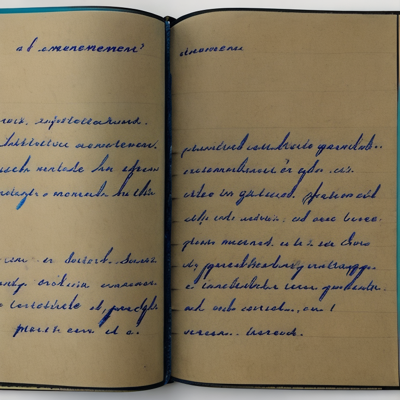

In [11]:
generate_image("A diary with entries describing moments of 'satisfaction', 'gratitude', and 'contentment', written in blue and green ink.", image_gen_model)

In [7]:
# Import necessary libraries
from PIL import Image, ImageDraw, ImageFont

# Define the prompts and corresponding emotions
prompts = [
    ("A serene lakeside at dawn with mist gently rising from the water, surrounded by lush, green trees.", "Calm and Peaceful"),
    ("A tranquil beach with soft, white sand and gentle waves lapping at the shore under a clear blue sky.", "Calm and Peaceful 2"),
    ("A dark forest with twisted, gnarled trees under a stormy sky, lightning illuminating the shadows.", "Anxious and Tense"),
    ("A desolate, rocky landscape with a turbulent, gray sea crashing against the cliffs.", "Anxious and Tense 2"),
    ("A vibrant meadow full of colorful wildflowers, with a bright sun shining in a clear blue sky and butterflies fluttering around.", "Joyful and Uplifting"),
    ("A sunny hillside with rolling green fields, dotted with blooming cherry blossoms and a rainbow arcing across the sky.", "Joyful and Uplifting 2"),
    ("A quiet, abandoned park in autumn, with leaves falling from the trees and a solitary bench under a cloudy sky.", "Sad and Melancholic"),
    ("A rain-soaked city street at dusk, with dim streetlights reflecting off the wet pavement and empty sidewalks.", "Sad and Melancholic 2"),
    ("A sunrise over a peaceful valley, with golden rays of light breaking through the morning fog and illuminating the landscape.", "Hopeful and Optimistic"),
    ("A clear, starry night sky over a serene desert, with a distant horizon showing the first hint of dawn.", "Hopeful and Optimistic 2"),
    ("A dense, foggy forest with barely visible paths winding through the trees, giving a sense of uncertainty and mystery.", "Confused and Lost"),
    ("A maze-like cityscape with narrow alleyways and towering buildings, illuminated by flickering neon lights.", "Confused and Lost 2"),
    ("A rugged mountain range with jagged peaks under a turbulent, stormy sky, lightning flashing in the distance.", "Angry and Turbulent"),
    ("A vast desert with a fierce sandstorm sweeping across the dunes, obscuring the horizon and creating a sense of chaos.", "Angry and Turbulent 2"),
    ("A cozy cabin in the woods with smoke curling from the chimney, surrounded by a snow-covered landscape and under a clear winter sky.", "Content and Satisfied"),
    ("A peaceful countryside with rolling hills, grazing sheep, and a warm, golden sunset casting long shadows.", "Content and Satisfied 2"),
    ("A solitary lighthouse on a rocky shore, surrounded by a vast, empty sea and under a cloudy, overcast sky.", "Lonely and Isolated"),
    ("An empty, expansive tundra with a single, lonely tree standing against the horizon under a pale, gray sky.", "Lonely and Isolated 2"),
    ("A bustling cityscape with vibrant street markets, colorful banners, and people moving energetically through the streets under a bright, sunny sky.", "Excited and Energized"),
    ("A dynamic mountain trail with a cascading waterfall, surrounded by lush greenery and vibrant wildlife under a clear, invigorating sky.", "Excited and Energized 2")
]

# Define the prompts and corresponding emotions for colors
prompt_couleur = [
    ("A calm turquoise expanse of water under a clear blue sky, with shades of emerald green in the depths.", "Calm and Peaceful"),
    ("An intense red background with splashes of black and irregular lines representing chaos and tension.", "Anxious and Tense"),
    ("A sky filled with bright and joyful hues of yellow, orange, and pink, evoking a sense of celebration and happiness.", "Joyful and Uplifting"),
    ("A monochrome landscape with shades of gray and dark blue, representing an atmosphere of sadness and melancholy.", "Sad and Melancholic"),
    ("A bright horizon with tones of golden yellow and light blue, symbolizing a new beginning and optimism.", "Hopeful and Optimistic"),
    ("A chaotic mix of blurred colors, mainly shades of purple and green, representing confusion and uncertainty.", "Confused and Lost"),
    ("A fiery sky with splashes of red, orange, and black, symbolizing anger and turbulence.", "Angry and Turbulent"),
    ("A warm background with soft shades of yellow and orange, representing satisfaction and contentment.", "Content and Satisfied"),
    ("A desolate landscape with shades of gray and beige, representing loneliness and isolation.", "Lonely and Isolated"),
    ("A dynamic background with vibrant and contrasting colors like red, yellow, and blue, evoking excitement and energy.", "Excited and Energized")
]

# Define the prompts and corresponding emotions for texts
prompt_texte = [
    ("An open book with white pages where soft words like 'serenity', 'tranquility', and 'rest' are written in cursive.", "Calm and Peaceful"),
    ("Paragraphs of text in black and red with words like 'fear', 'stress', and 'tension' scattered disorderly across a page.", "Anxious and Tense"),
    ("A colorful poster with words such as 'joy', 'happiness', and 'brightness' written in bold, luminous letters.", "Joyful and Uplifting"),
    ("Letters in dark gray forming phrases like 'loneliness', 'despair', and 'sadness', written in an elegant yet somber font.", "Sad and Melancholic"),
    ("A bright page with words like 'hope', 'future', and 'opportunity' written in golden letters and surrounded by inspiring motifs.", "Hopeful and Optimistic"),
    ("A draft text with words such as 'doubt', 'confusion', and 'lost' scattered randomly, giving a sense of disorder.", "Confused and Lost"),
    ("Words like 'anger', 'rage', and 'frustration' written in bright red and black, with irregular lines and splashes around.", "Angry and Turbulent"),
    ("A diary with entries describing moments of 'satisfaction', 'gratitude', and 'contentment', written in blue and green ink.", "Content and Satisfied"),
    ("A sheet of paper with words like 'solitary', 'isolated', and 'alone' written in small letters in a dark corner of the page.", "Lonely and Isolated"),
    ("A motivational poster with words such as 'energy', 'enthusiasm', and 'dynamism' written in bold, colorful letters, surrounded by dynamic motifs.", "Excited and Energized")
]


In [ ]:
# Fonction pour générer l'image de base
def generate_image_with_text(prompt, model):
    try:
        image = model(
            prompt, num_inference_steps=CFG.image_gen_steps,
            generator=CFG.generator,
            guidance_scale=CFG.image_gen_guidance_scale
        ).images[0]
        image = image.resize(CFG.image_gen_size)
        return image
    except Exception as e:
        logger.error(f"Error generating image for prompt '{prompt}': {e}")
        return None

# Fonction pour ajouter du texte à l'image générée
def add_text_to_image(image, texts, output_path):
    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype("arial.ttf", 40)
    except IOError:
        font = ImageFont.load_default()

    x, y = 50, 50
    line_height = font.getsize('A')[1] + 10

    for text in texts:
        draw.text((x, y), text, font=font, fill="black")
        y += line_height

    image.save(output_path)

# Générer et sauvegarder les images avec du texte

image = generate_image(prompt, image_gen_model)
texts = ["serenity", "tranquility", "rest"]  # Les mots à ajouter
        add_text_to_image(image, texts, output_path)
        logger.info(f"Image for '{emotion}' saved successfully.")
    else:
        logger.error(f"Failed to generate image for '{emotion}'.")


In [ ]:

# Function to add title to image
def add_title_to_image(image, title):
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()  # You can specify a different font and size if needed
    text_size = draw.textsize(title, font)
    position = ((image.width - text_size[0]) // 2, 10)  # Centered at the top
    draw.text(position, title, (255, 255, 255), font=font)
    return image

# Generate images and save them
for prompt, emotion in prompts:
    image = generate_image(prompt, image_gen_model)
    image_with_title = add_title_to_image(image, emotion)
    image_with_title.save(f"{emotion.replace(' ', '_').lower()}.png")

  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


  0%|          | 0/35 [00:00<?, ?it/s]

<ipython-input-14-45555e43887f>:5: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(title, font)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')